I read data needed to create model

In [1]:
import pandas as pd
import seaborn as sns

test_df = pd.read_csv(r"C:\Users\48666\Documents\Python Scripts\titanic\test.csv")
train_df = pd.read_csv(r"C:\Users\48666\Documents\Python Scripts\titanic\train.csv")


In the first step I check number of na values

In [2]:
na_num = train_df.isna().sum()
print(na_num)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In this step, I choose several features that contribute most to the target output.
As we can see above survived is the most correlated positively with fare, and at the same time survived is the most negativly correlated with Pclass. So I can assume that there is some correlation between wealth of the passengers and chances of survival.
Next step is to clusterize my data into data which I will use in my model.

In [23]:
pd.options.mode.chained_assignment = None 
tr_df = train_df.iloc[:,[1,2,5,6,7,9]]
tr_df['Pclass'].fillna(tr_df['Pclass'].median(), inplace=True)
tr_df['Age'].fillna(tr_df['Age'].median(), inplace=True)
tr_df['SibSp'].fillna(tr_df['SibSp'].median(), inplace=True)
tr_df['Parch'].fillna(tr_df['Parch'].median(), inplace=True)
tr_df['Fare'].fillna(tr_df['Fare'].median(), inplace=True)
print(tr_df)

     Survived  Pclass   Age  SibSp  Parch     Fare
0           0       3  22.0      1      0   7.2500
1           1       1  38.0      1      0  71.2833
2           1       3  26.0      0      0   7.9250
3           1       1  35.0      1      0  53.1000
4           0       3  35.0      0      0   8.0500
..        ...     ...   ...    ...    ...      ...
886         0       2  27.0      0      0  13.0000
887         1       1  19.0      0      0  30.0000
888         0       3  28.0      1      2  23.4500
889         1       1  26.0      0      0  30.0000
890         0       3  32.0      0      0   7.7500

[891 rows x 6 columns]


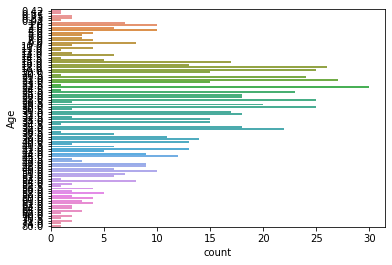

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(y=train_df['Age'])
plt.show()

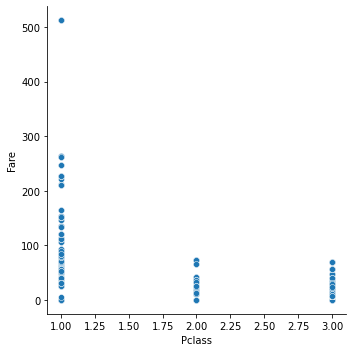

In [16]:
sns.relplot(x=train_df['Pclass'],y=train_df['Fare'])

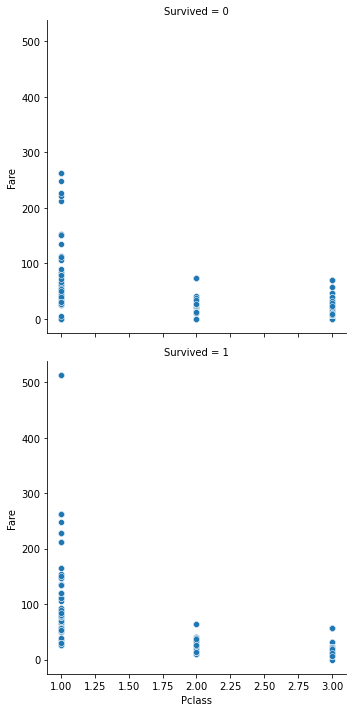

In [25]:
sns.relplot(x=train_df['Pclass'],y=train_df['Fare'],row=train_df['Survived'])

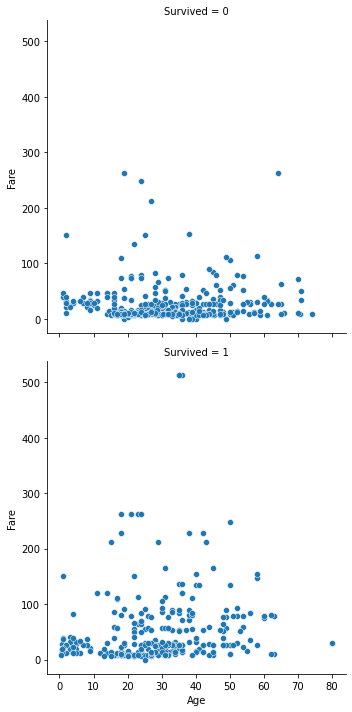

In [29]:
sns.relplot(x=train_df['Age'],y=train_df['Fare'],row=train_df['Survived'])